In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [8]:
df_cleaned_transcripted = pd.read_csv('../data/processed/cleaned_transcripted_dataset.csv')
df_cleaned_transcripted.head(3)

,id,search_tag,create_time,video_desc,stickers_on_video,video_hashtags,video_duration_in_sec,is_duet_enabled,duet_from_id,music_id,...,video_url,transcription,video_contains_music,video_contains_male,video_contains_female,video_contains_noise,video_contains_no_energy,segments,total_music_duration,percentage_of_video_made_of_music
0,6746590978280279301,joebiden,2019-10-11 12:58:42-04:00,so the former Vice President and I are best bu...,NaN,"joebiden, foryoupage",32,True,0,6746567236959406853,...,https://www.tiktok.com/@/video/674659097828027...,Do you know what Dab Me Up is? Do you know wha...,False,True,False,False,False,"[{'label': 'male', 'start': 0.0, 'end': 32.92}]",0.00,0.0
1,6748582567995378949,maga,2019-10-16 21:47:08-04:00,“Your organization is terrible” #maga #fyp,Trump talking to CNN reporter,"maga, fyp",20,True,0,6748577002363652870,...,https://www.tiktok.com/@/video/674858256799537...,"Go ahead, go ahead. No, not you, not you. Your...",False,True,False,False,False,"[{'label': 'male', 'start': 0.0, 'end': 20.580...",0.00,0.0
2,6752944407395175686,trump2020,2019-10-28 15:53:18-04:00,"The hat didn’t fit, but can the vid go viral s...",NaN,"fyp, foryou, trump2020, republican",10,True,0,6744484944707406597,...,https://www.tiktok.com/@/video/675294440739517...,There's not any.,True,True,False,True,True,"[{'label': 'noise', 'start': 0.0, 'end': 2.260...",4.54,45.4


#### Speech to Text statistics

In [9]:
video_tokens = []
video_lenght = []

for video in df_cleaned_transcripted['transcription']:
    video = str.lower(video)
    video_lenght.append(len(set(video.split())))
    video_tokens.append(len(video.split()))

In [16]:
print('Average Tokens per video:', round(np.mean(video_tokens), 2))
print('Median Tokens per video:', round(np.median(video_tokens), 2))
print('')
print('Average Unique Tokens per video', round(np.mean(video_lenght), 2))
print('Median Unique Tokens per video:', round(np.median(video_lenght), 2))

Average Tokens per video: 86.28
Median Tokens per video: 69.0

Average Unique Tokens per video 59.08
Median Unique Tokens per video: 51.0


In [17]:
print('First video was created at:', df_cleaned_transcripted['create_time'].min())
print('Last video was created at:', df_cleaned_transcripted['create_time'].max())

First video was created at: 2019-10-11 12:58:42-04:00
Last video was created at: 2020-12-31 17:52:20-05:00


### Commonly used hashtags
What hashtags are used along with others?

In [19]:
df_hashtags = df_cleaned_transcripted.loc[:, ['video_hashtags']].fillna('')
new_columns = set()  # Initialize a set to collect all unique hashtags

for idx, row in df_hashtags.iterrows():
    hashtags = row['video_hashtags'].split(',')
    hashtags = [hashtag.strip() for hashtag in hashtags if len(hashtag.strip()) > 0]
    new_columns.update(hashtags)  # Add the hashtags to the set of unique hashtags

# Create a new DataFrame with all unique hashtags as columns
df_hashtags = pd.concat([df_hashtags] + [pd.Series(0, name=col, dtype=int) for col in new_columns], axis=1)

for idx, row in df_hashtags.iterrows():
    hashtags = row['video_hashtags'].split(',')
    hashtags = [hashtag.strip() for hashtag in hashtags if len(hashtag.strip()) > 0]
    for hashtag in hashtags:
        df_hashtags.loc[idx, hashtag] = 1

df_hashtags = df_hashtags.drop('video_hashtags', axis=1)
df_hashtags = df_hashtags.fillna(0).astype(int)

df_hashtags.head(5)

,spin,oikosonetrip,ohno,slurpeesummer,resinartist,snl,honest,panafricanism,adamruinseverything,taxes,...,poorguy,queen,amazing,lesseroftwoevils,liljohnny,retainerchallenge,forthrboyz,1,worklife,truthbomb
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Co-occurence matrix

In [20]:
occurence_matrix = df_hashtags.T.dot(df_hashtags)
occurence_matrix['Total'] = occurence_matrix.sum(axis=0)
occurence_matrix = occurence_matrix.sort_values(by='Total', ascending=False)

occurence_matrix.head(20)

,spin,oikosonetrip,ohno,slurpeesummer,resinartist,snl,honest,panafricanism,adamruinseverything,taxes,...,queen,amazing,lesseroftwoevils,liljohnny,retainerchallenge,forthrboyz,1,worklife,truthbomb,Total
fyp,0,3,3,0,0,1,0,1,0,1,...,0,1,0,0,0,1,1,0,0,4369
trump2020,1,1,3,1,0,0,1,0,0,1,...,0,0,2,0,1,1,1,0,1,3626
biden2020,0,2,3,0,1,0,1,0,0,0,...,0,0,2,0,0,0,0,0,0,3351
trump,0,1,0,0,0,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,3310
foryou,0,2,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1928
maga,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1907
foryoupage,0,0,3,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,1593
politics,0,2,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1383
biden,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1277
election,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1026


### Selecting K most used hashtags

In [21]:
# Removing TikToks control hashtag
occurence_matrix.drop(['fy', 'fypシ', 'fyp', 'foryou', 'viral', 'foryoupage'], axis=0, inplace=True)
occurence_matrix.drop(['fy', 'fypシ', 'fyp', 'foryou', 'viral', 'foryoupage'], axis=1, inplace=True)

In [25]:
K = 30
most_used_k_tags = occurence_matrix.iloc[:K]

most_used_k_tags_index = most_used_k_tags.index.tolist() + ['Total']

# Calculate the sum of rows and assign it to a new DataFrame
sum_row = pd.DataFrame(most_used_k_tags.sum(numeric_only=True), columns=['Total']).T

most_used_k_tags = pd.concat([most_used_k_tags, sum_row], ignore_index=True)
most_used_k_tags.index = most_used_k_tags_index

most_common_k_tags = most_used_k_tags.T.sort_values(by='Total', axis=0, ascending=False).loc[most_used_k_tags_index].index

most_common_tags = most_used_k_tags[most_common_k_tags].drop('Total', axis=1)
most_common_tags = most_common_tags.drop('Total')  # Remove unnecessary indexing
index_sort = np.argsort(np.diag(most_common_tags))[::-1]
most_common_tags = most_common_tags.iloc[index_sort, index_sort]

most_common_tags

,trump2020,biden2020,trump,maga,biden,politics,election,vote,liberal,republican,...,dumptrump,usa,greenscreen,america,duet,bidenharris2020,xyzbca,2020,blacklivesmatter,republicans
trump2020,508,206,137,139,49,55,46,33,53,67,...,9,23,19,23,23,6,18,18,15,3
biden2020,206,490,85,53,70,75,77,73,62,32,...,24,16,24,9,14,31,19,8,13,3
trump,137,85,408,93,116,60,60,41,39,38,...,20,29,23,20,13,10,13,21,9,7
maga,139,53,93,227,18,25,13,15,34,44,...,14,19,3,15,10,4,3,5,12,3
biden,49,70,116,18,161,35,47,27,17,15,...,3,9,13,6,3,10,8,9,2,2
politics,55,75,60,25,35,152,19,21,28,31,...,15,14,10,9,5,3,4,4,3,4
election,46,77,60,13,47,19,131,33,5,7,...,3,5,4,8,4,10,3,10,0,2
vote,33,73,41,15,27,21,33,113,9,5,...,15,5,8,5,6,12,5,9,1,0
liberal,53,62,39,34,17,28,5,9,106,31,...,7,4,7,0,2,4,3,0,2,6
republican,67,32,38,44,15,31,7,5,31,102,...,2,9,3,4,3,1,4,3,3,0


### Generating Heatmap

In [26]:
# Removing diagonal values
most_common_tags_labels = most_common_tags.columns
most_common_tags = most_common_tags.values.astype(float)
most_common_tags[np.diag_indices_from(most_common_tags)] = np.NaN

In [27]:
# Removing upper diagonal values
mask = np.zeros_like(most_common_tags, dtype='bool')
mask[np.tril_indices_from(mask)] = True

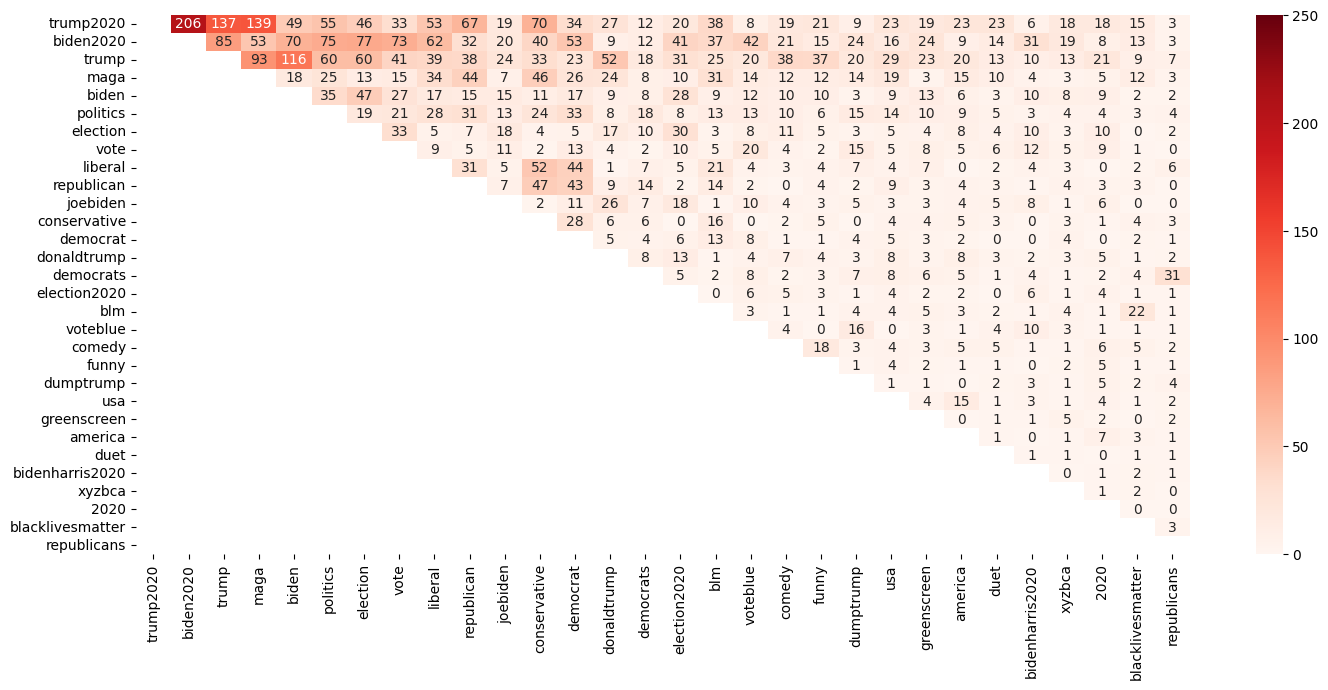

In [30]:
plt.figure(figsize=(17,7))
sns.heatmap(most_common_tags,
            annot=True,
            cmap='Reds',
            fmt='.0f',
            vmax=250,
            xticklabels=most_common_tags_labels,
            yticklabels=most_common_tags_labels,
            mask=mask)
plt.show()

### Pairwise Analysis
How do pairs of hashtags correlate with the topic assigned by BTM?

In [31]:
predictions_df = pd.read_csv('../data/processed/predictions_btm_whisper.csv')
predictions_df.head()

,id,search_tag,create_time,video_desc,stickers_on_video,video_hashtags,video_duration_in_sec,is_duet_enabled,duet_from_id,music_id,...,video_contains_no_energy,segments,total_music_duration,percentage_of_video_made_of_music,full_text,full_text_lemmas,topic_btm,is_toxic,toxicity_min,toxicity_max
0,6746590978280279301,joebiden,2019-10-11 12:58:42-04:00,so the former Vice President and I are best bu...,NaN,"joebiden, foryoupage",32,True,0,6746567236959406853,...,False,"[{'label': 'male', 'start': 0.0, 'end': 32.92}]",0.00,0.000000,so the former vice president and i are best bu...,former vice president best buds joebiden foryo...,Casual Conversations and Reactions,0,0.0000,0.9778
1,6748582567995378949,maga,2019-10-16 21:47:08-04:00,“Your organization is terrible” #maga #fyp,Trump talking to CNN reporter,"maga, fyp",20,True,0,6748577002363652870,...,False,"[{'label': 'male', 'start': 0.0, 'end': 20.580...",0.00,0.000000,“your organization is terrible” #maga #fyp go ...,organization terrible maga fyp go ahead go ahe...,Casual Conversations and Reactions,1,-0.6531,0.0000
2,6752944407395175686,trump2020,2019-10-28 15:53:18-04:00,"The hat didn’t fit, but can the vid go viral s...",NaN,"fyp, foryou, trump2020, republican",10,True,0,6744484944707406597,...,True,"[{'label': 'noise', 'start': 0.0, 'end': 2.260...",4.54,45.400000,"the hat didn’t fit, but can the vid go viral s...",hat nt fit vid go viral trump sees it? #fyp f...,Social Media and Political Engagement,1,-0.1531,0.0000
3,6755172553632926981,trump2020,2019-11-03 14:59:36-05:00,Keep America great #donaldtrump #trump2020 #tr...,Trump 20 20,"donaldtrump, trump2020, trump, trumptrain, ins...",38,True,0,6755152356901423877,...,True,"[{'label': 'male', 'start': 0.0, 'end': 4.24},...",16.22,42.684211,keep america great #donaldtrump #trump2020 #tr...,keep america great donaldtrump trump2020 trump...,U.S. Politics and Elections,0,0.0000,0.9199
4,6758547542276852998,maga,2019-11-12 17:16:18-05:00,#trump2020 #foryourpage #maga #maga #kag,NaN,"trump2020, foryourpage, maga, maga, kag",45,False,0,6758505275898039046,...,False,"[{'label': 'music', 'start': 0.0, 'end': 11.46...",29.76,66.133333,#trump2020 #foryourpage #maga #maga #kag what?...,trump2020 foryourpage maga maga kag kill sir k...,Social Media and Political Engagement,1,-0.7041,0.0000


In [39]:
most_frequent_hashtags = most_used_k_tags_index[:-1]  # Exclude the 'Total' row

# Generate pairs from the most frequent hashtags
most_frequent_pairs = []
for i, hashtag in enumerate(most_frequent_hashtags):
    for j in range(i + 1, len(most_frequent_hashtags)):
        pair = (hashtag, most_frequent_hashtags[j])
        most_frequent_pairs.append(pair)

In [48]:
import re

pairwise_lst = []
pairwise_toxicity_df = pd.DataFrame()
parsed_hashtags = []

for pair in most_frequent_pairs:
    a, b = pair  # Unpack the pair tuple
    
    # Sort the hashtags alphabetically
    pair = tuple(sorted(pair))
    pair_hashtag = '/'.join(pair)
    
    if pair_hashtag in parsed_hashtags:
        continue
        
    pair_data = predictions_df.loc[
        (predictions_df['video_hashtags'].str.contains(r'(\b|^){}(\b|$)'.format(a))) &
        (predictions_df['video_hashtags'].str.contains(r'(\b|^){}(\b|$)'.format(b)))]
    
    pair_dict = {
        'pair_hashtag': pair_hashtag,
        'total_videos': len(pair_data),
        'perc_total': len(pair_data) * 100 / len(df_cleaned_transcripted),
        'perc_toxic_videos': pair_data['is_toxic'].sum() * 100 / len(pair_data)
    }
    
    top_topics = pair_data['topic_btm'].value_counts().index[:3].values
    pair_dict['top_topics'] = ', '.join(top_topics)
    
    pairwise_lst.append(pair_dict)
    parsed_hashtags.append(pair_hashtag)

C:\Users\snell\AppData\Local\Temp\ipykernel_21968\754171243.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (predictions_df['video_hashtags'].str.contains(r'(\b|^){}(\b|$)'.format(a))) &
C:\Users\snell\AppData\Local\Temp\ipykernel_21968\754171243.py:19: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (predictions_df['video_hashtags'].str.contains(r'(\b|^){}(\b|$)'.format(b)))]
C:\Users\snell\AppData\Local\Temp\ipykernel_21968\754171243.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (predictions_df['video_hashtags'].str.contains(r'(\b|^){}(\b|$)'.format(a))) &
C:\Users\snell\AppData\Local\Temp\ipykernel_21968\754171243.py:19: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To 

In [56]:
pairwise_w_toxicity_df = pd.DataFrame.from_dict(pairwise_lst).drop_duplicates()
pairwise_w_toxicity_df.head()

,pair_hashtag,total_videos,perc_total,perc_toxic_videos,top_topics
0,biden2020/trump2020,206,17.881944,37.378641,"U.S. Politics and Elections, Social Media and ..."
1,trump/trump2020,138,11.979167,35.507246,"Social Media and Political Engagement, U.S. Po..."
2,maga/trump2020,140,12.152778,40.714286,"Social Media and Political Engagement, Racism ..."
3,politics/trump2020,55,4.774306,47.272727,"Social Media and Political Engagement, Racism ..."
4,biden/trump2020,49,4.253472,36.734694,"U.S. Politics and Elections, Social Media and ..."


In [57]:
import plotly.express as px
# Percentage of most toxic hashtags in top 10 total videos
top_10_toxic_hashtags = pairwise_w_toxicity_df\
                            .sort_values('total_videos', ascending=False)\
                            .head(10)\
                            .sort_values('perc_toxic_videos')
fig = px.bar(top_10_toxic_hashtags, y='pair_hashtag', x='perc_toxic_videos', color_discrete_sequence=['#c0392b'])
fig.update_layout(
    title='<b>Top 10 toxic hashtag pairs</b><br>Percentage of toxic videos in most frequent hashtag pairs',
    xaxis=dict(title='<b>% of toxic videos</b>'),
    yaxis=dict(title='<b>Hashtag pair</b>')
)
fig.show()

In [59]:
fig = px.bar((predictions_df.groupby('topic_btm')['is_toxic'].sum() * 100 / predictions_df.groupby('topic_btm')['id'].count()).sort_values(ascending=True).reset_index(), 
             y='topic_btm', 
             x=0,
             color_discrete_sequence=['#c0392b'])
fig.update_layout(
    title='<b>Percentage of toxic videos per topic<b>',
    xaxis=dict(title='<b>% of toxic videos</b>'),
    yaxis=dict(title='<b>Topic</b>')
                 )
fig.show()

In [60]:
predictions_df.loc[:, 'video_hashtags'] = predictions_df['video_hashtags'].str.replace('lefttiktok', 'leftiktok')
predictions_df.loc[:, 'video_hashtags'] = predictions_df['video_hashtags'].str.replace('righttiktok', 'rightiktok')

In [77]:
def is_valid_hashtag(hashtag):
    hashtag = hashtag.strip()
    ignore_hashtags = ['fyp', 'fy', 'foryou', 'foryoupage', 'viral', '']
    
    if hashtag in ignore_hashtags:
        return False
    
    if len(hashtag1) == 0:
        return False
    
    return True

pairwise_dfs = []
top_pairwise_keys = set()

for topic in predictions_df['topic_btm'].unique():
    topic_pairwise_hashtag_dict = {}
    print(topic)
    topic_data = predictions_df.loc[predictions_df['topic_btm'] == topic].dropna()
    
    for video_idx in range(len(topic_data)):
        video = topic_data.iloc[video_idx]
        video_hashtags = video['video_hashtags'].split(',')
        
        for hashtag1 in video_hashtags:
            if is_valid_hashtag(hashtag1):
                for hashtag2 in video_hashtags:
                    if is_valid_hashtag(hashtag2):
                        if hashtag1 != hashtag2:
                            hashtag_pair = [hashtag1.strip(), hashtag2.strip()]
                            hashtag_pair.sort()

                            hashtag_pair = '/'.join(hashtag_pair)
                            topic_pairwise_hashtag_dict[hashtag_pair] = topic_pairwise_hashtag_dict.get(hashtag_pair, 0) + .5

    # Sorting, selecting the top 10 pairs, and appending the df to the list to be concatenated
    sorted_topic_pairwise_hashtag_dict = dict(sorted(topic_pairwise_hashtag_dict.items(), key=lambda x: x[1], reverse=True))
    pairwise_df = pd.DataFrame.from_dict(sorted_topic_pairwise_hashtag_dict, orient='index')
    pairwise_df_index = pairwise_df.iloc[:10]
    
    if not pairwise_df_index.empty:
        pairwise_df_index.columns = [topic]
        display(pairwise_df_index)
        top_pairwise_keys.update(pairwise_df_index.index)
        pairwise_dfs.append(pairwise_df_index)

if pairwise_dfs:
    # Concatenate the DataFrames
    pairwise_combined_df = pd.concat(pairwise_dfs, axis=1)

    # Select the top N pairwise hashtags based on their counts
    N = 10
    top_pairwise_df = pairwise_combined_df.loc[list(top_pairwise_keys)].head(N)

    # Transpose the DataFrame for better visualization
    top_pairwise_df = top_pairwise_df.transpose()

    # Plot a bar chart for each hashtag pair
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(figsize=(12, 8))
    top_pairwise_df.plot(kind='barh', stacked=True, ax=ax)
    ax.legend(ncol=1, loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_title('Top {} Pairwise Hashtags by Topic'.format(N))

    plt.show()
else:
    print("No valid pairwise DataFrames to display.")

Casual Conversations and Reactions
Social Media and Political Engagement
U.S. Politics and Elections
Presidential Actions and America
Racism and Society
Voting and Political Engagement
General Conversations and Opinions
Social Justice and Activism
Trump's Statements and Personality
Speculations and Opinions
No valid pairwise DataFrames to display.
